## Modul 6 Clustering
<b>Nama<b>: Muhammad Alfhi Saputra<br> 
<b>NIP<b>: DS0120

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler 


C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Baca Data

In [2]:
url = "https://raw.githubusercontent.com/alfhi24/DTI_DS01/main/modul%206%20clustering/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Cek jika terdapat null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df1 = df.copy()
df1 = df1.drop(['CustomerID'], axis=1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Melihat distribusi data

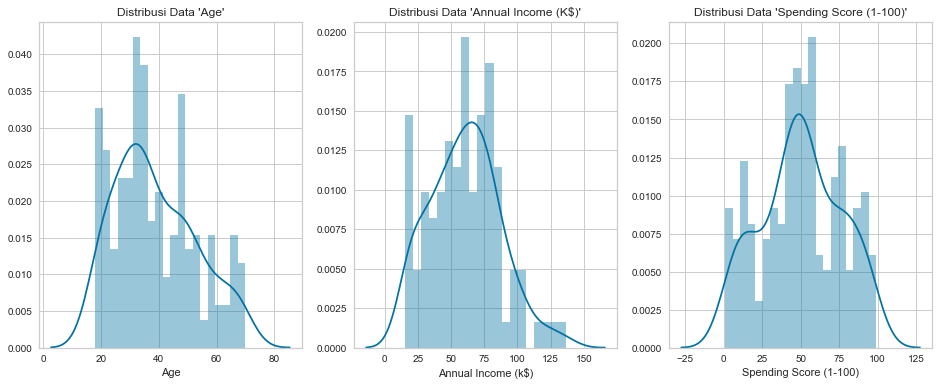

In [7]:
fig = plt.figure(figsize = (16 , 6)) # create figure

ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3)


sns.distplot(df1['Age'] , bins = 20, ax=ax0)
ax0.set_title("Distribusi Data 'Age'")

sns.distplot(df1['Annual Income (k$)'] , bins = 20, ax=ax1)
ax1.set_title ("Distribusi Data 'Annual Income (K$)'")

sns.distplot(df1['Spending Score (1-100)'] , bins = 20, ax=ax2)
ax2.set_title ("Distribusi Data 'Spending Score (1-100)'")


plt.show()

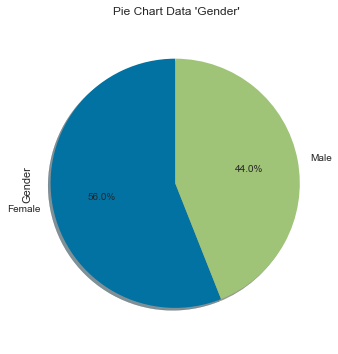

In [8]:
df1['Gender'].value_counts().plot(kind='pie',
                                 figsize=(5, 6),
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 shadow=True)

plt.title("Pie Chart Data 'Gender'")
plt.axis('equal')

plt.show()

### Melihat korelasi antar variabel

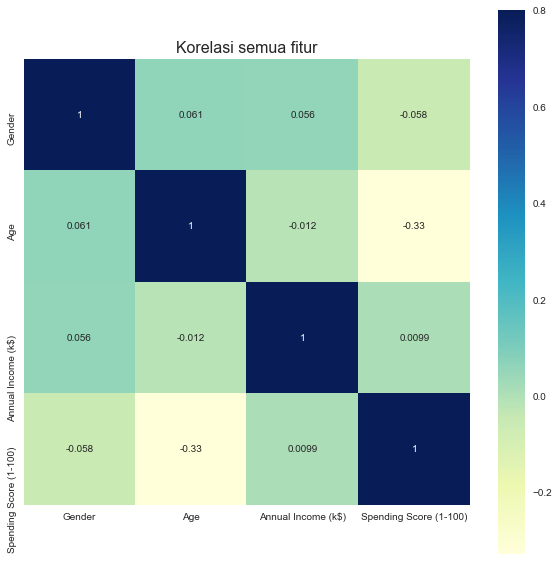

In [9]:
df1['Gender'] = df1['Gender'].replace(['Male','Female'],[1,0])
correlation = df1.corr()
f , ax = plt.subplots(figsize = (10,10))
plt.title('Korelasi semua fitur',y=1,size=16)
sns.heatmap(correlation,square = True, cmap= 'YlGnBu', annot=True, vmax=0.8)

## Mendefinisikan fitur yang digunakan untuk clustering
Fitur yang digunakan adalah 'Annual Income (k$)' dan 'Spending Score (1-100)'

In [10]:
X = df1[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Melakukan scaling data menggunakan standard scaler

In [11]:
scaler = StandardScaler() 
column_names = X.columns.tolist()
X[column_names] = scaler.fit_transform(X[column_names])
X.sort_index(inplace=True)
X

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
5,-1.662660,1.001596
6,-1.624491,-1.715913
7,-1.624491,1.700384
8,-1.586321,-1.832378
9,-1.586321,0.846310


### Plotting data (fitur)

Text(0, 0.5, 'Spending Score')

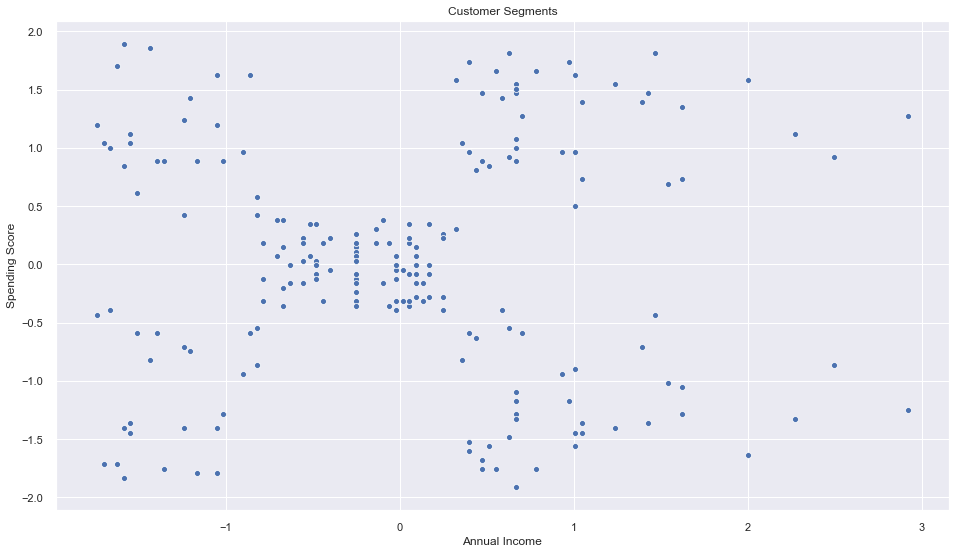

In [12]:
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

### Menentukan nilai K
Menggunakan metode elbow dan silhouette index

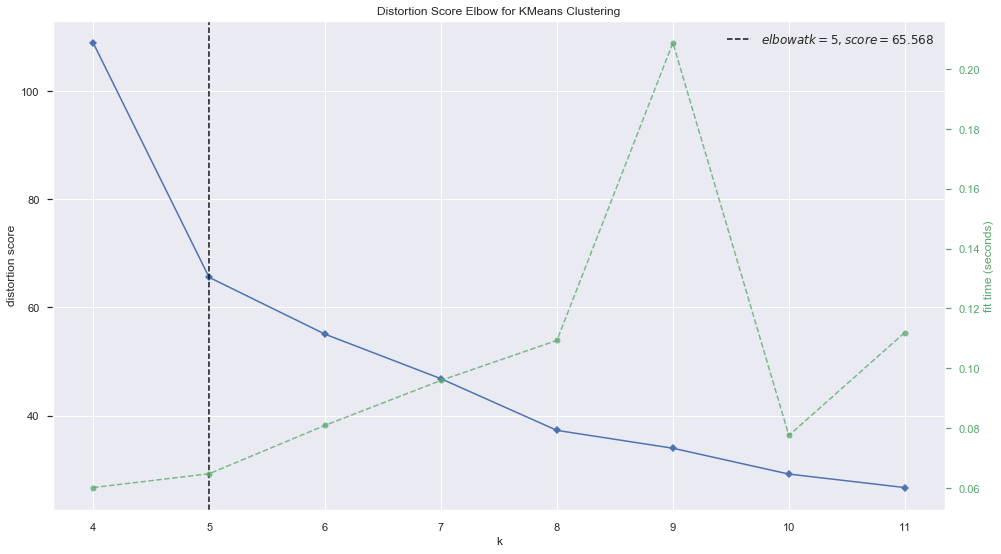

In [13]:
model = KMeans().fit(X)
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)
visualizer.show()

In [14]:
range_n_clusters = list (range(2,11))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.28640637225274423)
For n_clusters = 3, silhouette score is 0.46658474419000145)
For n_clusters = 4, silhouette score is 0.4939069237513199)
For n_clusters = 5, silhouette score is 0.5546571631111091)
For n_clusters = 6, silhouette score is 0.5380630705007141)
For n_clusters = 7, silhouette score is 0.5281492781108291)
For n_clusters = 8, silhouette score is 0.4541279523637649)
For n_clusters = 9, silhouette score is 0.4570853966942764)
For n_clusters = 10, silhouette score is 0.4505029621610447)


Berdasarkan model elbow dan nilai silhouette di atas, maka nilai K yang paling optimal adalah 5

### Pemodelan K-Means

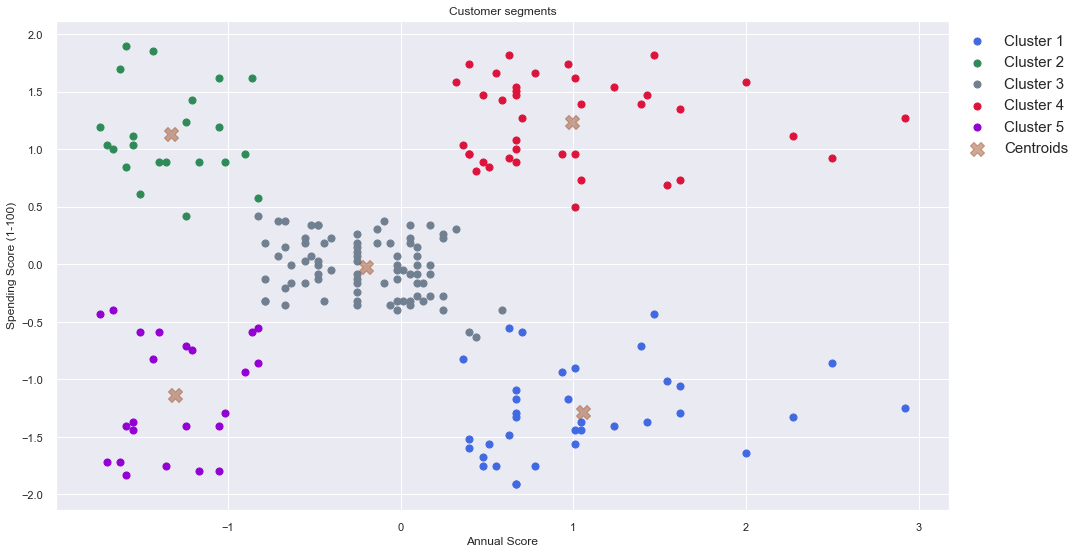

In [15]:
income = X.to_numpy()
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1', c= 'royalblue')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2', c = 'seagreen')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3', c = 'slategrey')
plt.scatter(income[cluster == 3, 0], income[cluster == 3, 1], s = 50, label = 'Cluster 4', c = 'crimson')
plt.scatter(income[cluster == 4, 0], income[cluster == 4, 1], s = 50, label = 'Cluster 5', c = 'darkviolet')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='X', alpha=0.5, label='Centroids', c ='sienna')
plt.title('Customer segments')
plt.xlabel('Annual Score')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)
plt.show()

## Penjelasan
Berdasarkan hasil pemodelan menggunakan K-Means di atas, maka terdapat 5 jenis customer yang dapat dikategorikan sebagai berikut:
1. cluster 1 adalah kelompok customer yang memiliki pendapatan menengah ke besar dan pengeluaran kecil. Cluster ini dapat disebut customer sangat hemat
2. Cluster 2 adalah kelompok customer yang memiliki pendapatan kecil dan pengeluaran besar. Cluster ini dapat disebut customer sangat boros.
3. Cluster 3 adalah kelompok customer yang memiliki pendapatan menengah dan pengeluaran menengah. Cluster ini dapat disebut customer cukup.
4. Cluster 4 adalah kelompok customer yang memiliki pendapatan menengah ke besar dan pengeluaran menengah ke besar. Cluster ini dapat disebut customer boros.
5. Cluster 5 adalah kelompok customer yang memiliki pendapatan kecil dan pengeluaran kecil. Cluster ini dapat disebut customer hemat.

### Hasil clustering dalam bentuk dataframe

In [16]:
df['Cluster'] = cluster
df['Cluster'] = df['Cluster'].replace([0, 1, 2, 3, 4],['Sangat Hemat', 'Sangat Boros', 'Cukup', 'Boros', 'Hemat'])

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Hemat
1,2,Male,21,15,81,Sangat Boros
2,3,Female,20,16,6,Hemat
3,4,Female,23,16,77,Sangat Boros
4,5,Female,31,17,40,Hemat


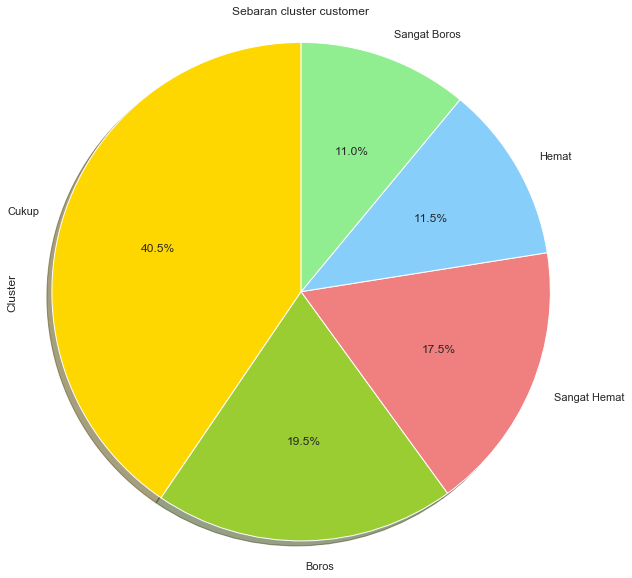

In [17]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'cyan', 'palegreen', 'royalblue']
df['Cluster'].value_counts().plot(kind='pie',
                                 figsize=(10, 10),
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 shadow=True,
                                 colors=colors_list)

plt.title("Sebaran cluster customer")
plt.axis('equal')

plt.show()